  ## Logistic Regression

#### Problem Statement


The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.shape

(1340, 7)

In [4]:
# dropping the CASENUM column
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [62]:
data.shape

(1340, 6)

In [5]:
#checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
#checking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
# data['CLMSEX']=data['CLMSEX'].fillna()
# data['CLMINSUR']=data['CLMINSUR'].fillna()

In [13]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [12]:
data.CLMSEX.value_counts().index[0]

1.0

In [14]:
data.CLMINSUR.value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

In [15]:
data.CLMINSUR.value_counts().index[0]

1.0

In [16]:
# creating a user-defined function for imputing the missing values 
# with mode(numerical and categorical data)
## Lambda-->Lambda argument:expression
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

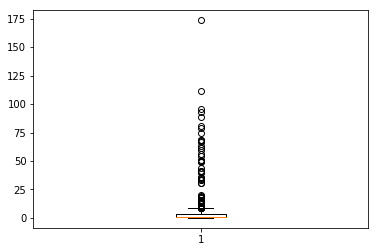

In [18]:
## Loss column
plt.boxplot(data.LOSS)
plt.show()

    -->Data Entry mistake
    1. Outliers also missing values-->Imputation
    2. Winsorization-->Outliers are replaced with next small     value
    Example:[1,2,3,4,5,6,78,89,9000]--->9000 as an outlier--->9000 will  be replace with 89
    one analysis-->including oytliers
    one analysis-->drop all the outliers

In [25]:
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [63]:
#iloc-tow indices,column indices
data.iloc[:,1:]# indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
5,1.0,1.0,0.0,35.0,0.309
6,0.0,1.0,0.0,9.0,3.538
7,1.0,1.0,0.0,34.0,4.881
8,1.0,1.0,0.0,60.0,0.874
9,0.0,1.0,0.0,10.0,0.350


In [24]:
# split the data into Input and Output
x= data.iloc[:,1:]
y= data.ATTORNEY

In [30]:
# Split the data into training and testing
#Build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [65]:
x_train.shape

(938, 5)

In [66]:
x_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
744,1.0,1.0,0.0,40.0,5.091
363,1.0,1.0,0.0,46.0,173.604
10,1.0,1.0,0.0,37.0,6.190
971,0.0,1.0,0.0,68.0,9.008
634,1.0,1.0,1.0,10.0,8.053
554,1.0,1.0,0.0,10.0,0.500
314,1.0,1.0,0.0,0.0,1.380
419,0.0,0.0,0.0,50.0,3.719
525,0.0,1.0,0.0,13.0,0.085
1043,0.0,1.0,0.0,9.0,3.050


In [61]:
#Build the classifier on training data
#SKlearn library:import,instantiate,fit
from sklearn.linear_model import LogisticRegression 
reg=LogisticRegression()
reg.fit(x_train,y_train)#Input and Output will be passes to the fit method

C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
#predicting on train data
#Syntax:objectName.predict(Input)
y_train_pred= reg.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

y_train(Actual Values) and y_train_pred(Predicted values)--> Training

In [67]:
y_train== y_train_pred # Comparing actual values and predicted values

744      True
363      True
10       True
971      True
634      True
554      True
314      True
419      True
525      True
1043     True
649     False
1308     True
790      True
1284     True
104      True
1097    False
370      True
495      True
1243    False
903     False
125     False
694     False
980      True
1225     True
1253     True
529     False
932      True
1141     True
1036     True
968     False
        ...  
1031     True
141     False
1110    False
753      True
1001    False
1239     True
580      True
562      True
398      True
668      True
252      True
907      True
468      True
914     False
357      True
1278     True
1300    False
1202     True
1305     True
508      True
749      True
129      True
144      True
960      True
847      True
715     False
905     False
1096     True
235     False
1061     True
Name: ATTORNEY, Length: 938, dtype: bool

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf=confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

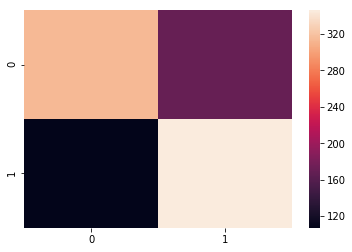

In [35]:
sns.heatmap(conf)

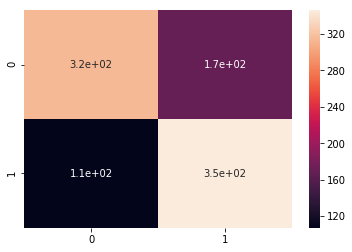

In [36]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

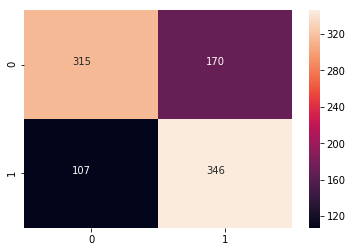

In [68]:
# supported values for ha are : 'center', 'right', 'left'
# supported values for va are : 'top', 'bottom', 'center', 'baseline', 'center_baseline
# fmt can also be given as d(integer formatting)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

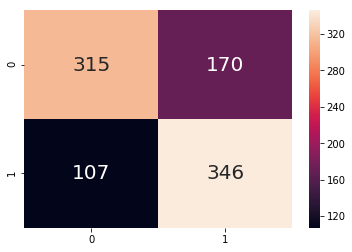

In [38]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True, fmt='3.0f',annot_kws={'size':'20'})

In [45]:
conf[0]

array([315, 170], dtype=int64)

In [69]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [48]:
conf[0][0]
conf[0][1]

170

In [51]:
print('true_positive =' ,conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_negative=' ,conf[1][1])

true_positive = 315
false_positive= 170
false_negative= 107
true_negative= 346


1--->Hiring an Attorney
0--->Not Hiring an Attorney
Number of False Positives

In [39]:
## accuracy-->TP+TN/TP+FP+TN+FN
(315+345)/(315+170+108+346)

0.7028753993610224

In [43]:
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [53]:
true_positive=conf[0][0]
false_positive=conf[0][1]

In [54]:
## Precision Rate
Precision = true_positive/(true_positive+false_positive)
Precision

0.6494845360824743

In [55]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [59]:
false_negative=conf[1][0]

In [60]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [70]:
# Hiring Attorney-->1 and Not Hiring Attorney--> 0

true_negative=conf[0][0]  # True Negative-->Actual Value is Not Hiring Attorney(0) and Predicted Value is Not Hiring Attorney(0)

false_positive=conf[0][1] #False Positive-->Actual Value is Not Hiring Attorney()0 and Predicted Value is Hiring Attorney(1)

false_negative = conf[1][0] #False Negative--> Actual value is Hiring Attorney(1) and Predicted Value is Not Hiring Attorney(0)

true_positive = conf[1][1] # True Positive--> Actual Value is Hiring Attorney(1) and Predicted Value is Hiring Attorney(1)

In [71]:
## Precision 
Precision = true_positive/(true_positive+false_positive)
Precision

0.6705426356589147

In [72]:
# Precision 
# Syntax: precision_score(actualValues, predictedValues)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.6705426356589147

In [73]:
# Out of all the actual values, how many are correctly classified
Recall = true_positive/(true_positive+false_negative)
print(Recall)

# Recall calculated by using a function
recall_score(y_train, y_train_pred)

0.7637969094922737


0.7637969094922737

In [74]:
# Calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)  # f1_score(Actual Values, Predicted values)

0.7141382868937047

In [75]:
# Prediction on Test Data
# Calculate the metrics for test data--> confusion matrix, Precision, Recall, F1-Score
# Comapre the score with training data

In [76]:
# Data Preprocessing Steps
# Visualize all the columns in your
# Correlation
# Make a proper documentation of all the steps whichever performing on dataset